In [8]:
from cloudpathlib import S3Path, S3Client
from pathlib import Path

# Set up our cache path:
cache_path = Path('/tmp/cache')
if not cache_path.exists():
    cache_path.mkdir()

# Create the root S3Path for the NYU Retinotopy Dataset:
nyu_base_path = S3Path(
    's3://openneuro.org/ds005237/',
    client=S3Client(
        no_sign_request=True,
        local_cache_dir=cache_path))

FileNotFoundError: [WinError 3] The system cannot find the path specified: '\\tmp\\cache'

In [2]:
nyu_base_path

S3Path('s3://openneuro.org/ds005237/')

In [6]:
for file in nyu_base_path.iterdir():
    print(file)

NameError: name 'nyu_base_path' is not defined

In [7]:
timeseries_denoised = (nyu_base_path /'fMRI_timeseries_clean_denoised_GSR_parcellated/NDAR_INVAG023WG3')
for file in timeseries_denoised.iterdir():
    print(file)

s3://openneuro.org/ds005237/fMRI_timeseries_clean_denoised_GSR_parcellated/NDAR_INVAG023WG3/task-hammerAP_run-01_bold_Atlas_hp2000_clean_GSR_parcellated.h5
s3://openneuro.org/ds005237/fMRI_timeseries_clean_denoised_GSR_parcellated/NDAR_INVAG023WG3/task-restAP_run-01_bold_Atlas_hp2000_clean_GSR_parcellated.h5
s3://openneuro.org/ds005237/fMRI_timeseries_clean_denoised_GSR_parcellated/NDAR_INVAG023WG3/task-restAP_run-02_bold_Atlas_hp2000_clean_GSR_parcellated.h5
s3://openneuro.org/ds005237/fMRI_timeseries_clean_denoised_GSR_parcellated/NDAR_INVAG023WG3/task-restPA_run-01_bold_Atlas_hp2000_clean_GSR_parcellated.h5
s3://openneuro.org/ds005237/fMRI_timeseries_clean_denoised_GSR_parcellated/NDAR_INVAG023WG3/task-restPA_run-02_bold_Atlas_hp2000_clean_GSR_parcellated.h5
s3://openneuro.org/ds005237/fMRI_timeseries_clean_denoised_GSR_parcellated/NDAR_INVAG023WG3/task-stroopAP_run-01_bold_Atlas_hp2000_clean_GSR_parcellated.h5
s3://openneuro.org/ds005237/fMRI_timeseries_clean_denoised_GSR_parcellat

In [11]:
import json
json_file = (nyu_base_path/'dataset_description.json')
with json_file.open('r') as f:
    data = json.load(f)

# Now `data` is a Python dictionary or list
print(data)

{'Name': 'Transdiagnostic Connectome Project', 'BIDSVersion': '1.2.1', 'License': 'CC0', 'Authors': ['Sidhant Chopra', 'Carrisa V. Cocuzza', 'Connor Lawhead', 'Jocelyn A. Ricard', 'Loïc Labache', 'Lauren Patrick', 'Poornima Kumar', 'Arielle Rubenstein', 'Julia Moses', 'Lia Chen', 'Crystal Blankenbaker', 'Bryce Gillis', 'Laura T. Germine', 'Ilan Harpaz-Rote', 'BT Thomas Yeo', 'Justin T. Baker', 'Avram J. Holmes'], 'Acknowledgments': '', 'HowToAcknowledge': 'Please cite this paper:\nChopra, S., Cocuzza, C. V., Lawhead, C., Ricard, J. A., Labache, L., Patrick, L., Kumar, P., Rubenstein, A., Moses, J., Chen, L., Blankenbaker, C., Gillis, B., Germine, L. T., Harpaz-Rote, I., Yeo, B. T. T., Baker, J. T., & Holmes, A. J. (2022). The Transdiagnostic Connectome Project: a richly phenotyped open dataset for advancing the study of brain-behavior relationships in psychiatry. BioRxiv. https://doi.org/[insert DOI when available]', 'Funding': ['This work was supported by the National Institute of Men

In [3]:
import h5py
h5_file = S3Path('s3://openneuro.org/ds005237/fMRI_timeseries_clean_denoised_GSR_parcellated/NDAR_INVAG023WG3/task-hammerAP_run-01_bold_Atlas_hp2000_clean_GSR_parcellated.h5', client=S3Client(
        no_sign_request=True))
#h5_file = 's3://openneuro.org/ds005237/fMRI_timeseries_clean_denoised_GSR_parcellated/NDAR_INVAG023WG3/task-hammerAP_run-01_bold_Atlas_hp2000_clean_GSR_parcellated.h5'
with h5py.File(h5_file.open('rb'), 'r') as f:
    # Example: list top-level groups/datasets
    print(list(f.keys()))

NameError: name 'S3Path' is not defined

In [17]:
with h5py.File(h5_file.open('rb'), 'r') as f:
    def walk(name, obj):
        if isinstance(obj, h5py.Dataset):
            print(f"Dataset: {name}, shape: {obj.shape}, dtype: {obj.dtype}")
        elif isinstance(obj, h5py.Group):
            print(f"Group: {name}")

    f.visititems(walk)

Dataset: dataset, shape: (434, 493), dtype: float64


In [20]:
import numpy as np
with h5py.File(h5_file.open('rb'), 'r') as f:
    print("=== HDF5 File Structure ===")
    
    # List all top-level keys
    print("Top-level keys:", list(f.keys()))
    
    # Function to recursively explore the structure
    def explore_h5_structure(name, obj):
        print(f"{name}: {type(obj).__name__}")
        if isinstance(obj, h5py.Dataset):
            print(f"  Shape: {obj.shape}")
            print(f"  Data type: {obj.dtype}")
            print(f"  Size: {obj.size} elements")
            
            # Show attributes if any
            if obj.attrs:
                print(f"  Attributes: {dict(obj.attrs)}")
            
            # Show a sample of the data if it's not too large
            if obj.size < 100:
                print(f"  Data preview: {obj[...]}")
            elif len(obj.shape) == 1:
                print(f"  Data preview (first 10): {obj[:10]}")
            elif len(obj.shape) == 2:
                print(f"  Data preview (first 5x5): {obj[:5, :5]}")
            else:
                print(f"  Data preview (partial): {obj[tuple(slice(3) for _ in obj.shape)]}")
        
        print()
    
    # Explore the entire structure
    print("\n=== Detailed Structure ===")
    f.visititems(explore_h5_structure)
    
    # If you want to access specific datasets, here are some examples:
    print("=== Working with the data ===")
    
    # Get the first key to demonstrate data access
    if f.keys():
        first_key = list(f.keys())[0]
        dataset = f[first_key]
        
        print(f"Working with dataset: {first_key}")
        print(f"Shape: {dataset.shape}")
        print(f"Data type: {dataset.dtype}")
        
        # Convert to numpy array for analysis
        data_array = dataset[...]
        print(f"Loaded as numpy array with shape: {data_array.shape}")
        
        # Basic statistics
        if np.issubdtype(data_array.dtype, np.number):
            print(f"Min: {np.min(data_array)}")
            print(f"Max: {np.max(data_array)}")
            print(f"Mean: {np.mean(data_array)}")
            print(f"Std: {np.std(data_array)}")

=== HDF5 File Structure ===
Top-level keys: ['dataset']

=== Detailed Structure ===
dataset: Dataset
  Shape: (434, 493)
  Data type: float64
  Size: 213962 elements
  Data preview (first 5x5): [[ 1.10861161e+01 -1.76313890e+01  4.77817452e+01  2.93266971e+01
   2.86935750e+01]
 [ 4.09407971e+01 -9.84596791e+00  7.72203119e+01  3.80880287e+01
  -5.59326275e+01]
 [ 2.56647244e+01  2.40243310e+01  2.32728182e+01  3.44991541e+01
   4.98669910e+01]
 [-1.20839851e+01 -2.51141973e+01  1.59938441e+00 -1.52641660e+01
  -6.56662588e+00]
 [ 5.95190598e+00 -2.32659065e+00  7.99270249e-03  7.13025877e+01
   7.41416845e+01]]

=== Working with the data ===
Working with dataset: dataset
Shape: (434, 493)
Data type: float64
Loaded as numpy array with shape: (434, 493)
Min: -350.94277472212815
Max: 371.01639112135655
Mean: 1.3859824114717872e-13
Std: 54.590569828196735


In [22]:
  # Example: If this is a 2D array with regions x timepoints
if len(data_array.shape) == 2:
    n_regions, n_timepoints = data_array.shape
    print(f"Detected {n_regions} regions and {n_timepoints} timepoints")
    
    # Example: Get time series for first region
    region_1_timeseries = data_array[0, :]
    print(f"First region time series shape: {region_1_timeseries.shape}")
    
    # Example: Compute correlation matrix between regions
    correlation_matrix = np.corrcoef(data_array)
    print(f"Correlation matrix shape: {correlation_matrix.shape}")

Detected 434 regions and 493 timepoints
First region time series shape: (493,)
Correlation matrix shape: (434, 434)


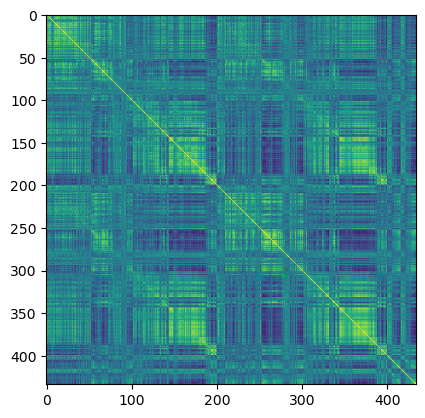

In [23]:
import matplotlib.pyplot as plt
plt.imshow(correlation_matrix)